# Random Forest Model

In [19]:
# Imports
import os
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt


In [3]:
# READ shapefile
shapefile_folder = r'C:\Users\bm233557\Documents\GradSchool\Climate\Project\shapefiles'
am_shp = os.path.join(shapefile_folder,'am_output.shp')
af_shp = os.path.join(shapefile_folder,'af_output.shp')
pm_shp = os.path.join(shapefile_folder,'pm_output.shp')

am_gdf = gpd.read_file(am_shp)
af_gdf = gpd.read_file(af_shp)
pm_gdf = gpd.read_file(pm_shp)

## Train the morning model

In [5]:
# target target variable
y = am_gdf['temp_f']
y.describe()

count    27927.000000
mean        76.248176
std          1.426780
min         72.500000
25%         75.300000
50%         76.100000
75%         77.100000
max         82.000000
Name: temp_f, dtype: float64

In [11]:
# create independent vars
variables = am_gdf.columns
dependent_variables = ['temp_f', 'rh', 'hi_f', 'geometry']
independent_vars = [var for var in variables if var not in dependent_variables]
X = am_gdf[independent_vars]
X.head()

,B01_1000m,B02_1000m,B03_1000m,B04_1000m,B05_1000m,B06_1000m,B07_1000m,B08_1000m,B09_1000m,B11_1000m,...,B03_900m,B04_900m,B05_900m,B06_900m,B07_900m,B08_900m,B09_900m,B11_900m,B12_900m,B8A_900m
0,0.093725,0.101336,0.130718,0.133481,0.176869,0.277727,0.312186,0.317295,0.332151,0.269172,...,0.132430,0.135769,0.178987,0.279038,0.313413,0.318645,0.332932,0.271084,0.201709,0.332237
1,0.093504,0.101134,0.130514,0.133224,0.176657,0.277716,0.312242,0.317376,0.332215,0.269049,...,0.132173,0.135466,0.178699,0.278904,0.313325,0.318559,0.332905,0.270917,0.201590,0.332158
2,0.093264,0.100908,0.130283,0.132942,0.176423,0.277702,0.312293,0.317452,0.332272,0.268907,...,0.131978,0.135224,0.178468,0.278825,0.313294,0.318534,0.332901,0.270789,0.201487,0.332123
3,0.092723,0.100341,0.129696,0.132209,0.175794,0.277594,0.312323,0.317603,0.332432,0.268358,...,0.131798,0.134889,0.178183,0.278782,0.313229,0.318468,0.332900,0.270448,0.201111,0.332092
4,0.092450,0.100059,0.129398,0.131857,0.175471,0.277462,0.312255,0.317593,0.332446,0.268144,...,0.131650,0.134677,0.178020,0.278808,0.313265,0.318566,0.332935,0.270370,0.200993,0.332166


In [12]:
X.describe()

,B01_1000m,B02_1000m,B03_1000m,B04_1000m,B05_1000m,B06_1000m,B07_1000m,B08_1000m,B09_1000m,B11_1000m,...,B03_900m,B04_900m,B05_900m,B06_900m,B07_900m,B08_900m,B09_900m,B11_900m,B12_900m,B8A_900m
count,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,...,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000,27927.000000
mean,0.068161,0.072391,0.098875,0.095777,0.142466,0.258859,0.299135,0.308894,0.329678,0.247048,...,0.099450,0.096531,0.143079,0.258750,0.298806,0.308531,0.329249,0.247641,0.164259,0.323106
std,0.017555,0.019099,0.019489,0.024760,0.021316,0.014813,0.019891,0.020548,0.026163,0.024906,...,0.020248,0.025705,0.022200,0.015401,0.020580,0.021300,0.027186,0.026098,0.029130,0.023094
min,0.031082,0.031955,0.058817,0.040395,0.097828,0.207081,0.239311,0.249732,0.264672,0.176840,...,0.058747,0.039814,0.094982,0.200933,0.234463,0.244383,0.259328,0.170407,0.097537,0.252580
25%,0.056238,0.059437,0.085256,0.078892,0.127283,0.249439,0.285338,0.294325,0.311726,0.228157,...,0.085270,0.078765,0.127190,0.249621,0.285099,0.293623,0.310711,0.227976,0.143014,0.306818
50%,0.064850,0.068978,0.095259,0.091351,0.138521,0.260319,0.298661,0.308673,0.327397,0.244714,...,0.095614,0.091851,0.138926,0.260480,0.298473,0.308695,0.326978,0.245709,0.161913,0.323342
75%,0.077734,0.082646,0.108737,0.108593,0.153693,0.269214,0.310999,0.320795,0.342184,0.264983,...,0.109957,0.110760,0.154863,0.269123,0.311358,0.320947,0.342461,0.266266,0.184399,0.336921
max,0.130198,0.139316,0.165852,0.176555,0.210749,0.301463,0.364686,0.375975,0.439488,0.331882,...,0.171463,0.182653,0.216899,0.303277,0.368278,0.379761,0.448394,0.348742,0.261979,0.398429


In [13]:
# split into training and validation
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=.33, random_state=1)

# Specify Model
temp_model = RandomForestRegressor(random_state=1)
# Fit Model
temp_model.fit(train_X, train_y)

# Make Predictions
val_predictions = temp_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {}".format(val_mae))

Validation MAE: 0.1414550056108902


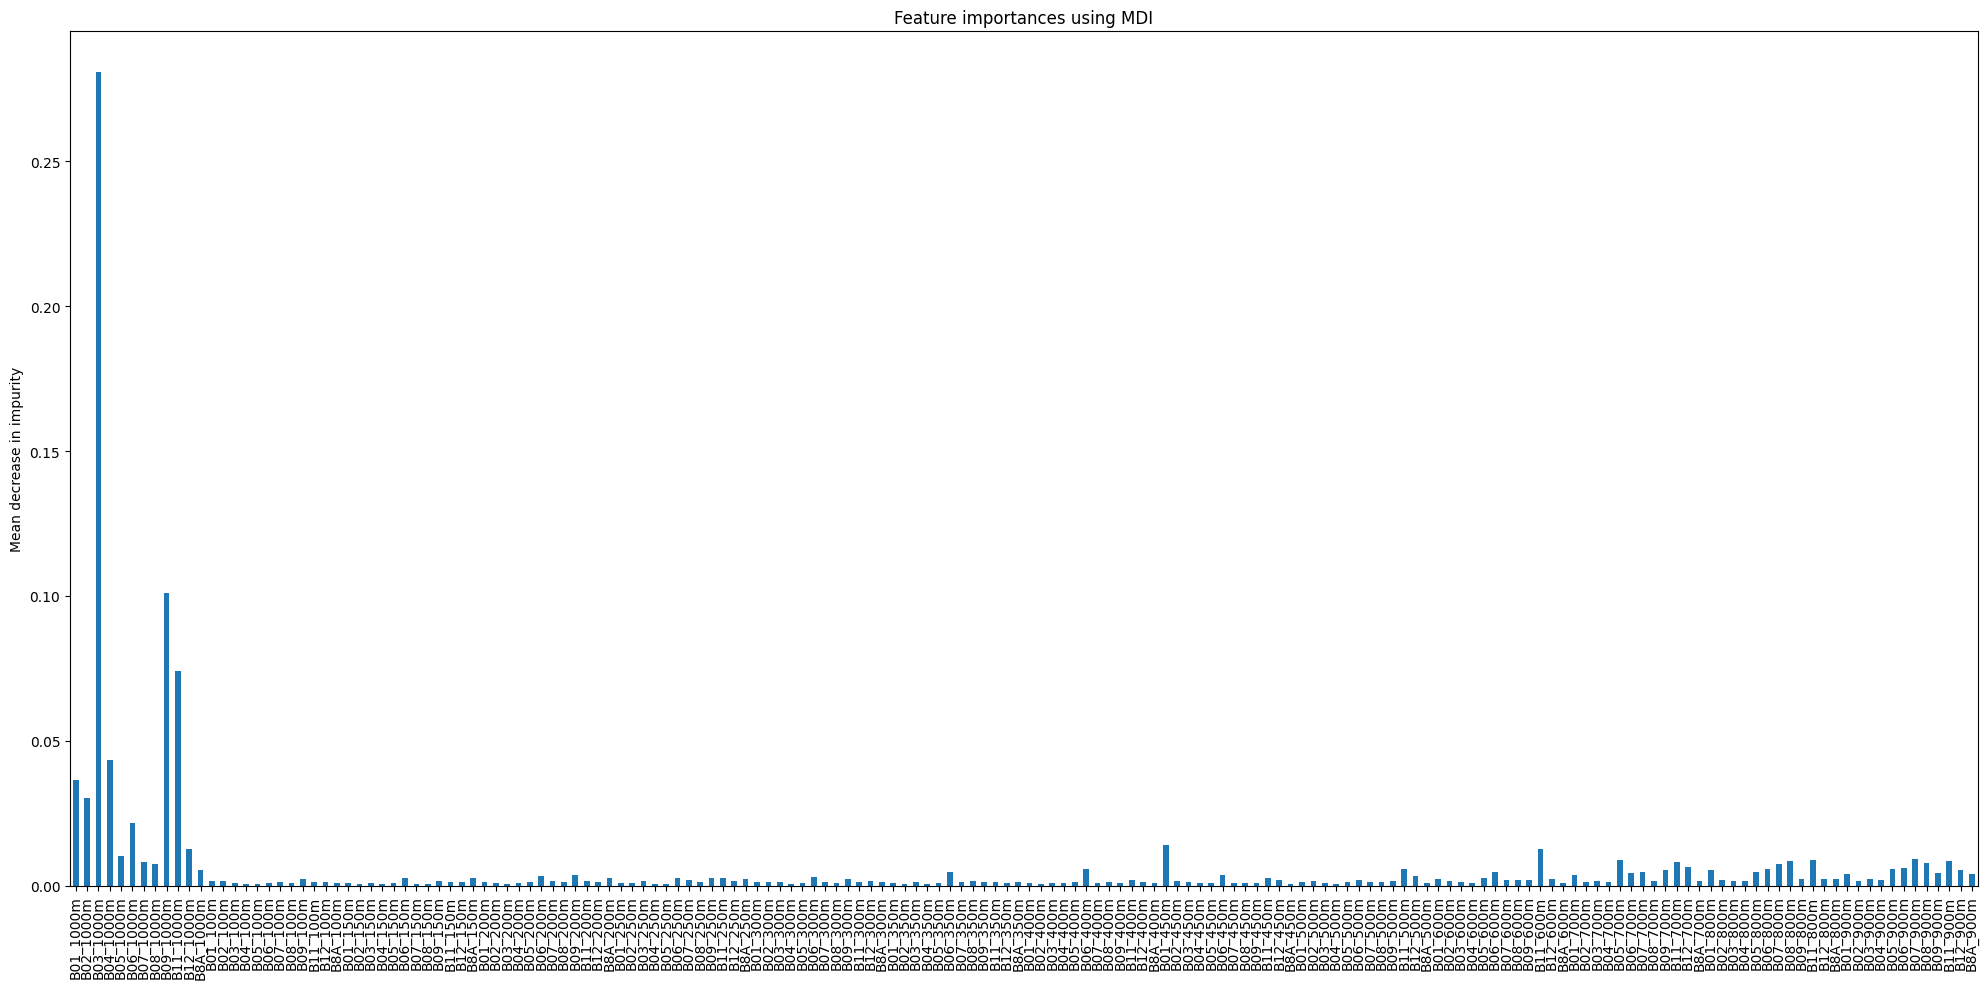

In [24]:
importances = temp_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in temp_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=independent_vars)

fig, ax = plt.subplots(figsize=(20,10))
forest_importances.plot.bar() #(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### ADD Data to new shape

In [26]:
fishnet_folder = r'C:\Users\bm233557\Documents\GradSchool\Climate\Project\fishnet'
fishnet_path = r'fishnet_10m_label.shp'
fishnet_shp = os.path.join(fishnet_folder, fishnet_path)
fishnet_gdp = gpd.read_file(fishnet_shp)
fishnet_gdp

,Id,geometry
0,0,POINT (481705 3749575)
1,0,POINT (481715 3749575)
2,0,POINT (481725 3749575)
3,0,POINT (481735 3749575)
4,0,POINT (481745 3749575)
...,...,...
17288875,0,POINT (521815 3792615)
17288876,0,POINT (521825 3792615)
17288877,0,POINT (521835 3792615)
17288878,0,POINT (521845 3792615)


file_path = 'am_TEST_data.csv'
trans_data = pd.read_csv(file_path)

# target target variable
y = trans_data['temp_f']
y.describe()

# create independent vars
variables = trans_data.columns
dependent_variables = ['temp_f', 'rh', 'hi_f']
independent_vars = [var for var in variables if var not in dependent_variables]
X = trans_data[independent_vars]
X.head()

# split into training and validation
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=.33, random_state=1)

# Specify Model
temp_model = RandomForestRegressor(random_state=1)
# Fit Model
temp_model.fit(train_X, train_y)

# Make Predictions
val_predictions = temp_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {}".format(val_mae))
